In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os, math
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from pandas_summary import DataFrameSummary
from tqdm import tqdm, tqdm_notebook
from pathlib import Path
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 400)
sns.set()

os.chdir('../..')
from src import utils

In [2]:
DATA        = Path('data')
RAW         = DATA/'raw'
INTERIM     = DATA/'interim'
PROCESSED   = DATA/'processed'
SUBMISSIONS = DATA/'submissions'

In [4]:
challenge  = pd.read_csv(RAW/'Challenge_20180423.csv', low_memory=False)
# customer   = pd.read_csv(RAW/'Customer.csv', low_memory=False)
# isin       = pd.read_csv(RAW/'Isin.csv', low_memory=False)
# submission = pd.read_csv(RAW/'sample_submission.csv', low_memory=False)
trade      = pd.read_csv(RAW/'Trade.csv', low_memory=False)
# market     = pd.read_csv(RAW/'Market.csv', low_memory=False)

In [5]:
len(set(challenge.CustomerIdx).difference(trade.CustomerIdx))

0

In [6]:
len(set(challenge.IsinIdx).difference(challenge.IsinIdx))

0

In [7]:
trade.CustomerIdx.nunique(), trade.IsinIdx.nunique()

(3439, 27305)

In [18]:
groups = trade[trade.CustomerInterest==1].groupby(['CustomerIdx', 'IsinIdx'], as_index=False)

In [19]:
g = groups['CustomerInterest'].max()

In [23]:
g.CustomerIdx.nunique(), g.IsinIdx.nunique()

(3439, 27169)

In [24]:
len(set(challenge.CustomerIdx).difference(g.CustomerIdx))

0

In [25]:
len(set(challenge.IsinIdx).difference(g.IsinIdx))

0

All the bonds and customers from challenge are contained in the trade matrix (sparse with 0.8% of ones)

In [26]:
len(g) / (g.CustomerIdx.nunique() * g.IsinIdx.nunique())

0.008046454857194622

In [77]:
len(all_g) / (all_g.CustomerIdx.nunique() * all_g.IsinIdx.nunique())

0.01486294818650891

In [27]:
g.head()

,CustomerIdx,IsinIdx,CustomerInterest
0,0,16471,1.0
1,0,16499,1.0
2,0,20601,1.0
3,0,20737,1.0
4,0,20909,1.0


In [28]:
from surprise import Reader, Dataset

In [231]:
reader = Reader(rating_scale=(0, 1))
data   = Dataset.load_from_df(all_g, reader)

In [232]:
data.split(n_folds=5)

In [233]:
from surprise import SVD, evaluate, NMF

In [235]:
%%time
algo = SVD(n_factors=15, n_epochs=50, biased=True)
evaluate(algo, data)

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.3228
MAE:  0.2251
------------
Fold 2
RMSE: 0.3228
MAE:  0.2258
------------
Fold 3
RMSE: 0.3232
MAE:  0.2258
------------
Fold 4
RMSE: 0.3227
MAE:  0.2259
------------
Fold 5
RMSE: 0.3219
MAE:  0.2244
------------
------------
Mean RMSE: 0.3227
Mean MAE : 0.2254
------------
------------
CPU times: user 4min 18s, sys: 180 ms, total: 4min 19s
Wall time: 4min 19s


In [105]:
%%time
algo = SVD()
evaluate(algo, data)

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.3332
MAE:  0.2404
------------
Fold 2
RMSE: 0.3338
MAE:  0.2410
------------
Fold 3
RMSE: 0.3332
MAE:  0.2405
------------
Fold 4
RMSE: 0.3335
MAE:  0.2408
------------
Fold 5
RMSE: 0.3333
MAE:  0.2415
------------
------------
Mean RMSE: 0.3334
Mean MAE : 0.2408
------------
------------
CPU times: user 4min 17s, sys: 204 ms, total: 4min 17s
Wall time: 4min 17s


In [106]:
from surprise import NormalPredictor

In [107]:
%%time
baseline = NormalPredictor()
evaluate(baseline, data)

/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/home/raduviri/anaconda3/envs/chana/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm NormalPredictor.

------------
Fold 1
RMSE: 0.6149
MAE:  0.4990
------------
Fold 2
RMSE: 0.6139
MAE:  0.4980
------------
Fold 3
RMSE: 0.6148
MAE:  0.4987
------------
Fold 4
RMSE: 0.6134
MAE:  0.4975
------------
Fold 5
RMSE: 0.6141
MAE:  0.4984
------------
------------
Mean RMSE: 0.6142
Mean MAE : 0.4983
------------
------------
CPU times: user 25.7 s, sys: 180 ms, total: 25.9 s
Wall time: 25.9 s


In [108]:
from surprise import SVD
svd = SVD()
reader = Reader(rating_scale=(0, 1))
data   = Dataset.load_from_df(all_g, reader)

In [111]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=1e-40)

In [112]:
%%time
svd.fit(trainset)

CPU times: user 1min 2s, sys: 4 ms, total: 1min 2s
Wall time: 1min 2s


In [125]:
from surprise import accuracy
predictions = svd.test(all_g.values)
accuracy.rmse(predictions)

RMSE: 1.0494


1.049394291004647

In [126]:
all_g.sample(5)

,CustomerIdx,IsinIdx,CustomerInterest
687603,2044,5479,1.0
1328212,3126,18846,1.0
292214,989,19389,0.0
896532,2371,13219,0.0
371583,1288,4555,1.0


In [154]:
all_g.sample(10)

,CustomerIdx,IsinIdx,CustomerInterest
46758,191,25060,1.0
1137274,2695,7090,1.0
76057,267,16142,0.0
700195,2064,13833,0.0
961497,2443,24906,1.0
1161843,2736,3658,1.0
1271519,2940,5764,1.0
1211962,2806,13441,0.0
1243304,2858,17815,1.0
1036062,2523,3172,1.0


In [173]:
from tqdm import tqdm_notebook
train_preds = []
for cIdx, iIdx in tqdm_notebook(zip(all_g.CustomerIdx, all_g.IsinIdx), total=len(all_g)):
    train_preds.append(svd.predict(cIdx, iIdx))

HBox(children=(IntProgress(value=0, max=1395659), HTML(value='')))

In [174]:
preds = [x[3] for x in train_preds]

In [179]:
from sklearn.metrics import roc_auc_score

In [177]:
all_g.CustomerInterest.value_counts()

1.0    751814
0.0    643845
Name: CustomerInterest, dtype: int64

In [181]:
roc_auc_score(all_g.CustomerInterest, preds)

0.9456763943333137

In [169]:
svd.predict(2523, 3172)

Prediction(uid=2523, iid=3172, r_ui=None, est=1, details={'was_impossible': False})

In [101]:
from surprise import accuracy
predictions = svd.test(testset)
accuracy.rmse(predictions)

RMSE: 0.3334


0.3333818376425491

In [80]:
g.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerIdx,751814.0,1879.568923,893.157819,0.0,1137.0,2045.0,2567.0,3470.0
IsinIdx,751814.0,14958.699823,7949.683237,0.0,7890.0,15352.0,22494.0,27357.0
CustomerInterest,751814.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [40]:
algo.pu.shape, algo.bu.shape, algo.qi.shape, algo.bi.shape

((3353, 100), (3353,), (26753, 100), (26753,))

In [82]:
g.CustomerIdx.nunique(), g.IsinIdx.nunique()

(3439, 27169)

In [85]:
algo.bu[]

-8.962148813037011e-05

In [45]:
g.sample(5)

,CustomerIdx,IsinIdx,CustomerInterest
423101,2181,25571,1.0
655024,2808,5765,1.0
594620,2647,8826,1.0
161474,945,21323,1.0
235935,1513,22832,1.0


In [73]:
all_groups = trade.groupby(['CustomerIdx', 'IsinIdx'], as_index=False)
all_g = all_groups['CustomerInterest'].max()

In [74]:
all_g.sample(5)

,CustomerIdx,IsinIdx,CustomerInterest
597289,1916,1977,1.0
388541,1314,25423,0.0
1002876,2506,21188,0.0
348113,1178,15097,1.0
1360714,3254,7061,1.0


In [75]:
algo.estimate(1314, 25423)

1.906675694596447

## Baseline predictor

In [264]:
%%time
from surprise import NormalPredictor, evaluate, Reader, Dataset
baseline = NormalPredictor()
reader = Reader(rating_scale=(0, 1))
data   = Dataset.load_from_df(all_g, reader)
trainset = data.build_full_trainset()

CPU times: user 2.24 s, sys: 8 ms, total: 2.25 s
Wall time: 2.25 s


In [265]:
%%time
baseline.fit(trainset)

CPU times: user 1.67 s, sys: 4 ms, total: 1.68 s
Wall time: 1.7 s


In [266]:
from tqdm import tqdm_notebook
train_preds = []
for cIdx, iIdx in tqdm_notebook(zip(all_g.CustomerIdx, all_g.IsinIdx), total=len(all_g)):
    train_preds.append(baseline.predict(cIdx, iIdx)[3])

HBox(children=(IntProgress(value=0, max=1395659), HTML(value='')))

In [267]:
roc_auc_score(all_g.CustomerInterest, train_preds)

0.4993011262431226

## NMF

In [296]:
%%time
from surprise import NMF, evaluate, Reader, Dataset
nmf = NMF(n_factors=15, n_epochs=50, biased=True, verbose=True)
reader = Reader(rating_scale=(0, 1))
data   = Dataset.load_from_df(all_g.sample(frac=1, random_state=42), reader)
trainset = data.build_full_trainset()

CPU times: user 2.28 s, sys: 140 ms, total: 2.42 s
Wall time: 2.42 s


In [297]:
%%time
nmf.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
CPU times:

In [298]:
from tqdm import tqdm_notebook
train_preds = []
for cIdx, iIdx in tqdm_notebook(zip(all_g.CustomerIdx, all_g.IsinIdx), total=len(all_g)):
    train_preds.append(nmf.predict(cIdx, iIdx)[3])

HBox(children=(IntProgress(value=0, max=1395659), HTML(value='')))

In [299]:
roc_auc_score(all_g.CustomerInterest, train_preds)

0.9263721597776967

## SVD++

In [221]:
%%time
from surprise import SVDpp, evaluate, Reader, Dataset
svdpp = SVDpp(n_factors=15, n_epochs=50, verbose=True)
reader = Reader(rating_scale=(0, 1))
data   = Dataset.load_from_df(all_g, reader)
trainset, testset = train_test_split(data, test_size=1e-40)

CPU times: user 3.23 s, sys: 8 ms, total: 3.24 s
Wall time: 3.24 s


In [225]:
%%time
svdpp.fit(trainset)

In [ ]:
from tqdm import tqdm_notebook
train_preds = []
for cIdx, iIdx in tqdm_notebook(zip(all_g.CustomerIdx, all_g.IsinIdx), total=len(all_g)):
    train_preds.append(svdpp.predict(cIdx, iIdx)[3])

In [ ]:
roc_auc_score(all_g.CustomerInterest, train_preds)

## SVD

In [292]:
%%time
from surprise import SVD, evaluate, Reader, Dataset
svd = SVD(n_factors=15, n_epochs=50, biased=True, verbose=True)
reader = Reader(rating_scale=(0, 1))
data   = Dataset.load_from_df(all_g.sample(frac=1, random_state=42), reader)
trainset = data.build_full_trainset()

CPU times: user 2.21 s, sys: 124 ms, total: 2.34 s
Wall time: 2.46 s


In [293]:
%%time
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
CPU times:

In [294]:
from tqdm import tqdm_notebook
train_preds = []
for cIdx, iIdx in tqdm_notebook(zip(all_g.CustomerIdx, all_g.IsinIdx), total=len(all_g)):
    train_preds.append(svd.predict(cIdx, iIdx)[3])

HBox(children=(IntProgress(value=0, max=1395659), HTML(value='')))

In [295]:
roc_auc_score(all_g.CustomerInterest, train_preds)

0.9519385586826943

## Export info

In [226]:
svd.pu.shape, svd.qi.shape, svd.bu.shape, svd.bi.shape

((3439, 15), (27305, 15), (3439,), (27305,))

In [228]:
all_g.sample(5)

,CustomerIdx,IsinIdx,CustomerInterest
95463,408,16501,0.0
1186556,2759,22225,1.0
1046900,2549,26187,1.0
226736,777,21485,0.0
1137288,2695,7391,0.0


In [273]:
svd.predict(408, 16501)

Prediction(uid=408, iid=16501, r_ui=None, est=0, details={'was_impossible': False})

In [237]:
svd.trainset.to_inner_uid(2579), svd.trainset.to_inner_iid(22225)

(686, 13229)

In [240]:
svd.trainset._raw2inner_id_users[2579], svd.trainset._raw2inner_id_items[22225]

(686, 13229)

In [242]:
all_g.CustomerIdx.nunique(), all_g.IsinIdx.nunique()

(3439, 27305)

In [243]:
len(svd.trainset._raw2inner_id_users), len(svd.trainset._raw2inner_id_items)

(3439, 27305)

In [269]:
uid = svd.trainset._raw2inner_id_users
iid = svd.trainset._raw2inner_id_items

In [287]:
user_id = 2549
item_id = 26187
svd.predict(user_id, item_id)

Prediction(uid=2549, iid=26187, r_ui=None, est=0.84708409842896, details={'was_impossible': False})

In [279]:
svd.trainset.global_mean

1.5386802936820527

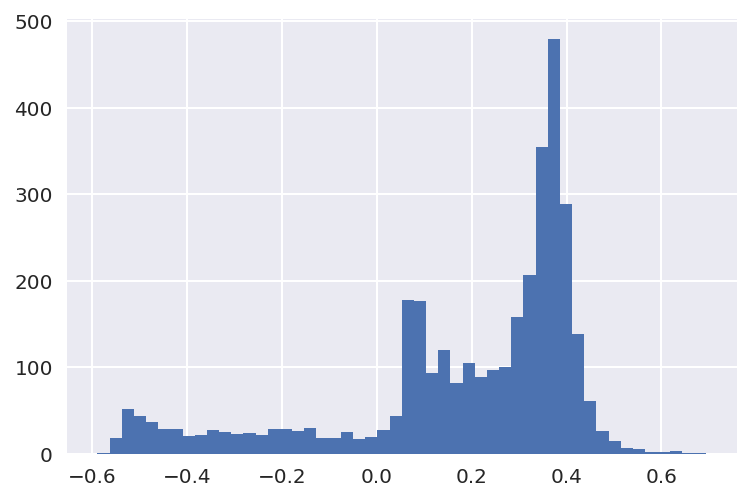

In [307]:
pd.Series(svd.bu).hist(bins=50)

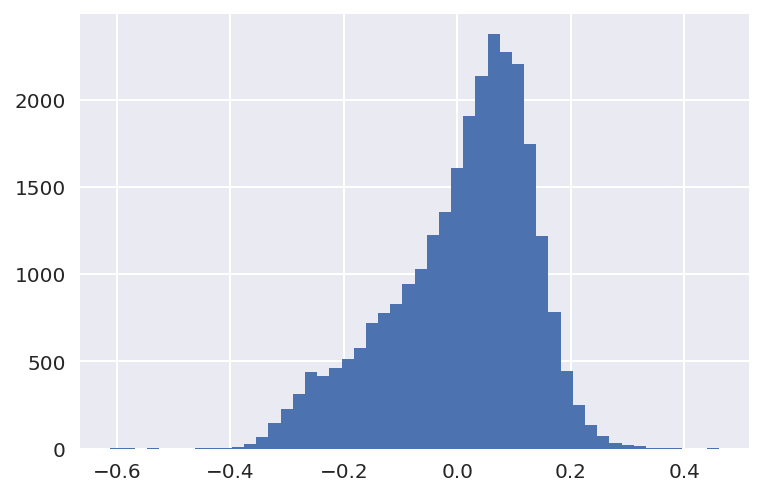

In [308]:
pd.Series(svd.bi).hist(bins=50)

In [281]:
svd.bu[uid[408]], svd.bi[iid[16501]]

(-0.4870384629779192, -0.1809056012566453)

In [282]:
np.dot(svd.qi[uid[408]], svd.pu[iid[16501]])

0.04389965084527779

In [309]:
res = svd.trainset.global_mean + svd.bu[uid[user_id]] + svd.bi[iid[item_id]] + \
        np.dot(svd.pu[uid[user_id]], svd.qi[iid[item_id]])

In [310]:
res

1.778242591248065

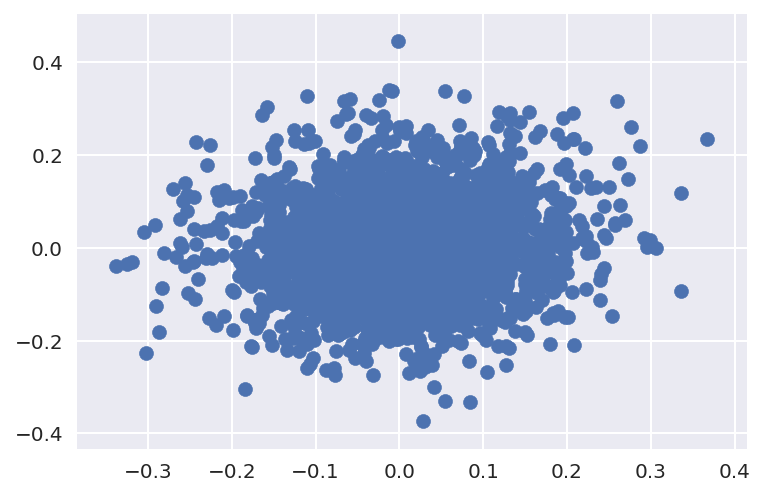

In [313]:
plt.scatter(svd.pu[:,0], svd.pu[:,1])

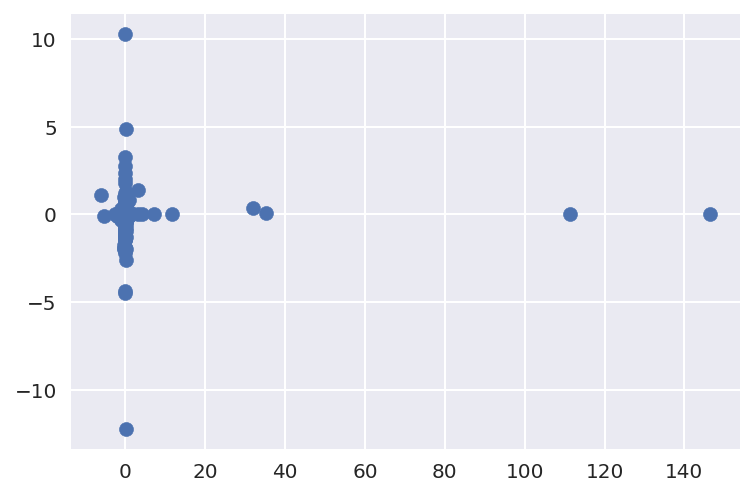

In [314]:
plt.scatter(nmf.pu[:,0], nmf.pu[:,1])

In [300]:
from surprise import dump

In [301]:
dump.dump(PROCESSED/'svd.dump', algo=svd)

In [302]:
dump.dump(PROCESSED/'nmf.dump', algo=nmf)